ML-Supervised Learning Project-1

Tadele Bizuye

tadelebizuye143@gmail.com

Step 1: Data Cleaning & Preprocessing

The first step is Load the data & understand the data very well.

In [1]:
# import neccesary libraries for data handling

import numpy as np 
import pandas as pd

# importing libraries for data visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings such as deprecation warning.
import warnings
warnings.filterwarnings("ignore")

# for data pre-processing & Model Selection

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
# Load dataset
df = pd.read_csv("C:/Users/TadeleBizuye/OneDrive - esxethiopia/Desktop/Laabza/Baacumen/M_6 Machine Learning(Supervised)/train.csv")

In [2]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [7]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

Step 1: Data Cleaning & Preprocessing 

 1.1 Handling Missing Data)

In [3]:
df["churn_risk_score"].value_counts() # This is our tareget variable. 

churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64

In [4]:
# Remove rows where 'churn_risk_score' is '-1'
df = df[df['churn_risk_score'] != -1]

# Reset index
df.reset_index(drop=True, inplace=True)

# Check the updated value counts
print(df['churn_risk_score'].value_counts())

churn_risk_score
3    10424
4    10185
5     9827
2     2741
1     2652
Name: count, dtype: int64


In [5]:
# To check the missing values
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5263
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            276
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3341
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [6]:
# To know how many data sets are missed. the first .sum() indicates coloumn & the second .sum() indicates No of columns.
pd.isnull(df).sum().sum() # As we can see in the output there are 8880 missed values. so we need to fill the missing values or remove it

np.int64(8880)

In [7]:
df["preferred_offer_types"].value_counts()

preferred_offer_types
Gift Vouchers/Coupons       11977
Credit/Debit Card Offers    11860
Without Offers              11716
Name: count, dtype: int64

In [8]:
df["gender"].value_counts()

gender
F          17892
M          17881
Unknown       56
Name: count, dtype: int64

In [9]:
# As we can see in the above in Gender columns about 59 data sets are "Unknown". so we need to remove it
# Remove rows where 'gender' is 'Unknown'
df = df[df['gender'] != 'Unknown']

# Reset index
df.reset_index(drop=True, inplace=True)

# To Check the updated value counts
df['gender'].value_counts()


gender
F    17892
M    17881
Name: count, dtype: int64

In [10]:
df = df[df["region_category"].notnull()]
df = df[df["points_in_wallet"].notnull()]
df.isnull().sum()

customer_id                       0
Name                              0
age                               0
gender                            0
security_no                       0
region_category                   0
membership_category               0
joining_date                      0
joined_through_referral           0
referral_id                       0
preferred_offer_types           209
medium_of_operation               0
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
churn_risk_score                  0
dtype: int64

As we  can see in the above only column  "preferred_offer_types" has a missing values so we need to adjust it.

In [11]:
df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0], inplace=True)
df.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

Waw!

Now All missing values are Handeled

All Columns in our data have equal number of rows(28,590)!

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27640 entries, 0 to 27639
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   27640 non-null  object 
 1   Name                          27640 non-null  object 
 2   age                           27640 non-null  int64  
 3   gender                        27640 non-null  object 
 4   security_no                   27640 non-null  object 
 5   region_category               27640 non-null  object 
 6   membership_category           27640 non-null  object 
 7   joining_date                  27640 non-null  object 
 8   joined_through_referral       27640 non-null  object 
 9   referral_id                   27640 non-null  object 
 10  preferred_offer_types         27640 non-null  object 
 11  medium_of_operation           27640 non-null  object 
 12  internet_option               27640 non-null  object 
 13  l

1.2 Data Type Correction

In [12]:
#Data Type Correction

# Convert 'joining_date' to datetime format
df['joining_date'] = pd.to_datetime(df['joining_date'], format='%Y-%m-%d')


# Convert 'last_visit_time' to time format (Hour : Minute: Second)
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], format='%H:%M:%S').dt.time

# Convert 'avg_frequency_login_days' to numerical (float), 
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')


1.3 Encoding Categorical Variables

In [13]:
# Label Encoding for binary categorical features
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])  # e.g., Male=1, Female=0
df['joined_through_referral'] = label_encoder.fit_transform(df['joined_through_referral'])  # Yes=1, No=0
df['used_special_discount'] = label_encoder.fit_transform(df['used_special_discount'])  # Yes=1, No=0
df['offer_application_preference'] = label_encoder.fit_transform(df['offer_application_preference'])  # Yes=1, No=0
df['past_complaint'] = label_encoder.fit_transform(df['past_complaint'])  # Yes=1, No=0

# One-Hot Encoding for other categorical features( i.e more than two categories)
#columns that needs to be encoding=['region_category', 'membership_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'complaint_status']

# Dear Teams,  Add this OneHot Encoder!!

In [31]:
df.describe()

,age,gender,joining_date,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,churn_risk_score
count,27640.000000,27640.000000,27640,27640.000000,27640.000000,27640.000000,27640.000000,25002.000000,27640.000000,27640.000000,27640.000000,27640.000000,27640.000000
mean,37.077171,0.499421,2016-07-04 06:24:29.175108352,1.275507,-42.753473,243.407828,29344.833461,15.975759,687.825283,0.549204,0.553835,0.498480,3.604595
min,10.000000,0.000000,2015-01-01 00:00:00,0.000000,-999.000000,-2814.109110,800.460000,-43.652702,-760.661236,0.000000,0.000000,0.000000,1.000000
25%,23.000000,0.000000,2015-09-30 00:00:00,1.000000,8.000000,59.650000,14233.377500,9.000000,616.587500,0.000000,0.000000,0.000000,3.000000
50%,37.000000,0.000000,2016-07-05 00:00:00,1.000000,12.000000,161.545000,27565.660000,16.000000,698.570000,1.000000,1.000000,0.000000,4.000000
75%,51.000000,1.000000,2017-04-07 00:00:00,2.000000,16.000000,356.097500,40898.487500,23.000000,764.902500,1.000000,1.000000,1.000000,5.000000
max,64.000000,1.000000,2017-12-31 00:00:00,2.000000,26.000000,3040.410000,99914.050000,73.061995,2069.069761,1.000000,1.000000,1.000000,5.000000
std,15.888225,0.500009,NaN,0.703143,230.424142,400.440543,19544.158898,9.235336,194.824630,0.497582,0.497102,0.500007,1.176516


In [35]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,0,XW0DQ7H,Village,Platinum Membership,2017-08-17,1,xxxxxxxx,...,300.63,53005.25,17.0,781.75,1,1,0,Not Applicable,Products always in Stock,2
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,0,1F2TCL3,Town,No Membership,2016-11-11,2,CID12313,...,516.16,21027.00,22.0,500.69,0,1,1,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,1,VJGJ33N,City,No Membership,2016-10-29,2,CID3793,...,53.27,25239.56,6.0,567.66,0,1,1,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,0,SVZXCWB,City,No Membership,2017-09-12,1,xxxxxxxx,...,113.13,24483.66,16.0,663.06,0,1,1,Solved,Poor Website,5
5,fffe43004900440036003300320035003300,Leslie Browder,13,1,PSG1LGF,City,Gold Membership,2016-01-08,1,xxxxxxxx,...,433.62,13884.77,24.0,722.27,1,0,1,Unsolved,No reason specified,3


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27640 entries, 0 to 35772
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   27640 non-null  object        
 1   Name                          27640 non-null  object        
 2   age                           27640 non-null  int64         
 3   gender                        27640 non-null  int64         
 4   security_no                   27640 non-null  object        
 5   region_category               27640 non-null  object        
 6   membership_category           27640 non-null  object        
 7   joining_date                  27640 non-null  datetime64[ns]
 8   joined_through_referral       27640 non-null  int64         
 9   referral_id                   27640 non-null  object        
 10  preferred_offer_types         27640 non-null  object        
 11  medium_of_operation           276

1.4 Outlier Detection & Handling

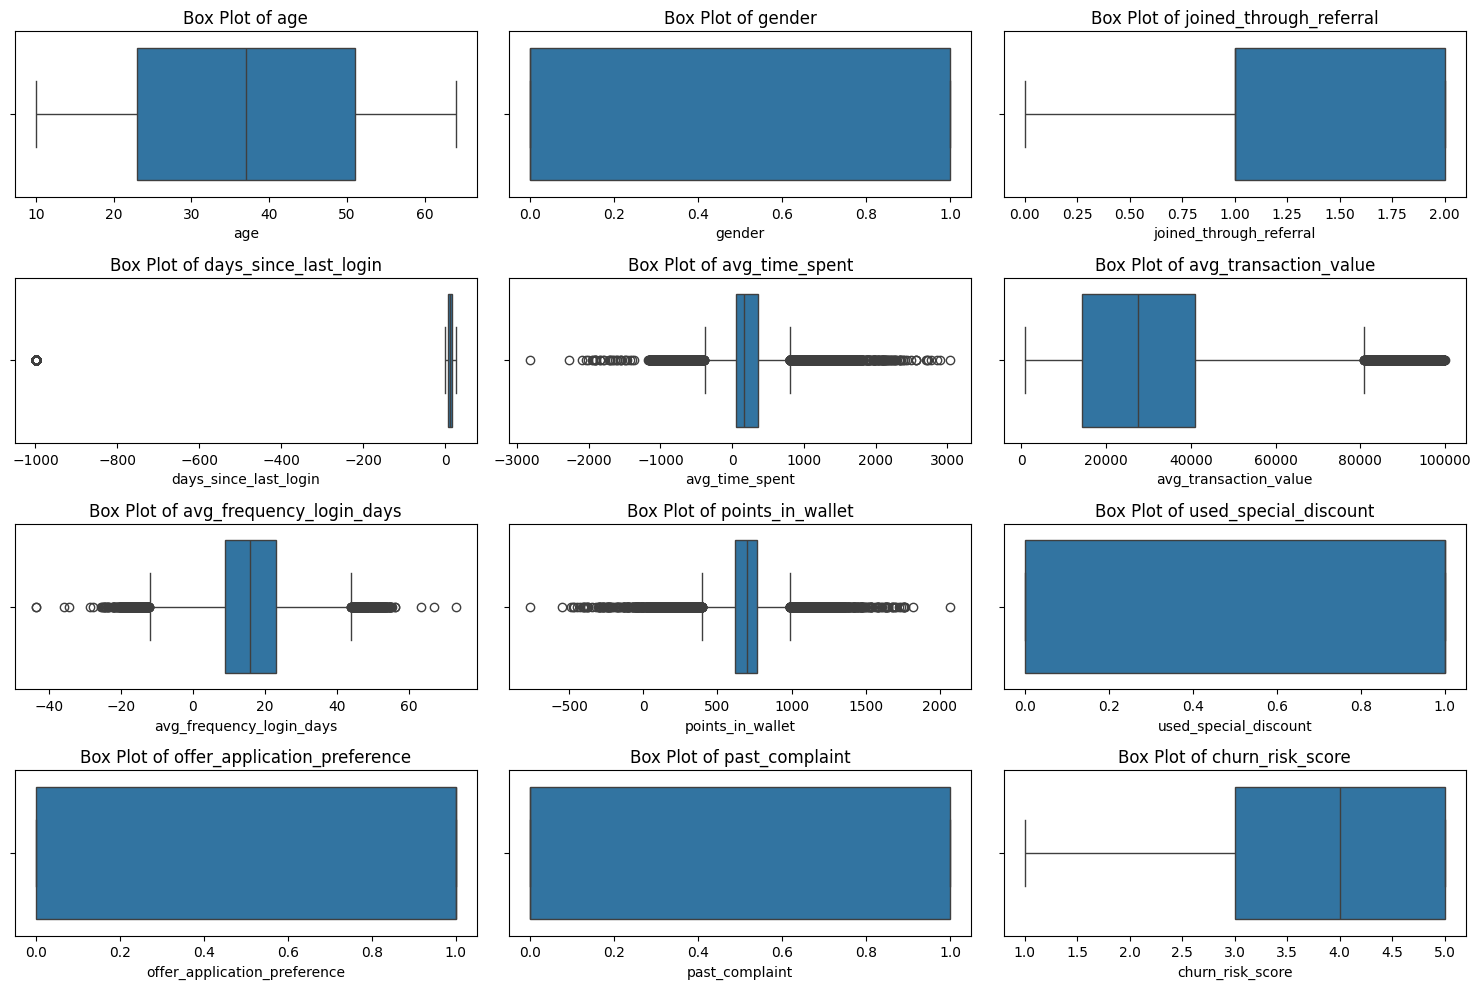

In [14]:
continues_variables = df.select_dtypes(include = ['float64', 'int64'])
plt.figure(figsize=(15, 10))
for i, column in enumerate(continues_variables):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=continues_variables[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show();

In [15]:
continues_variables = continues_variables.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), 
                                                         upper = x.quantile(0.95)))

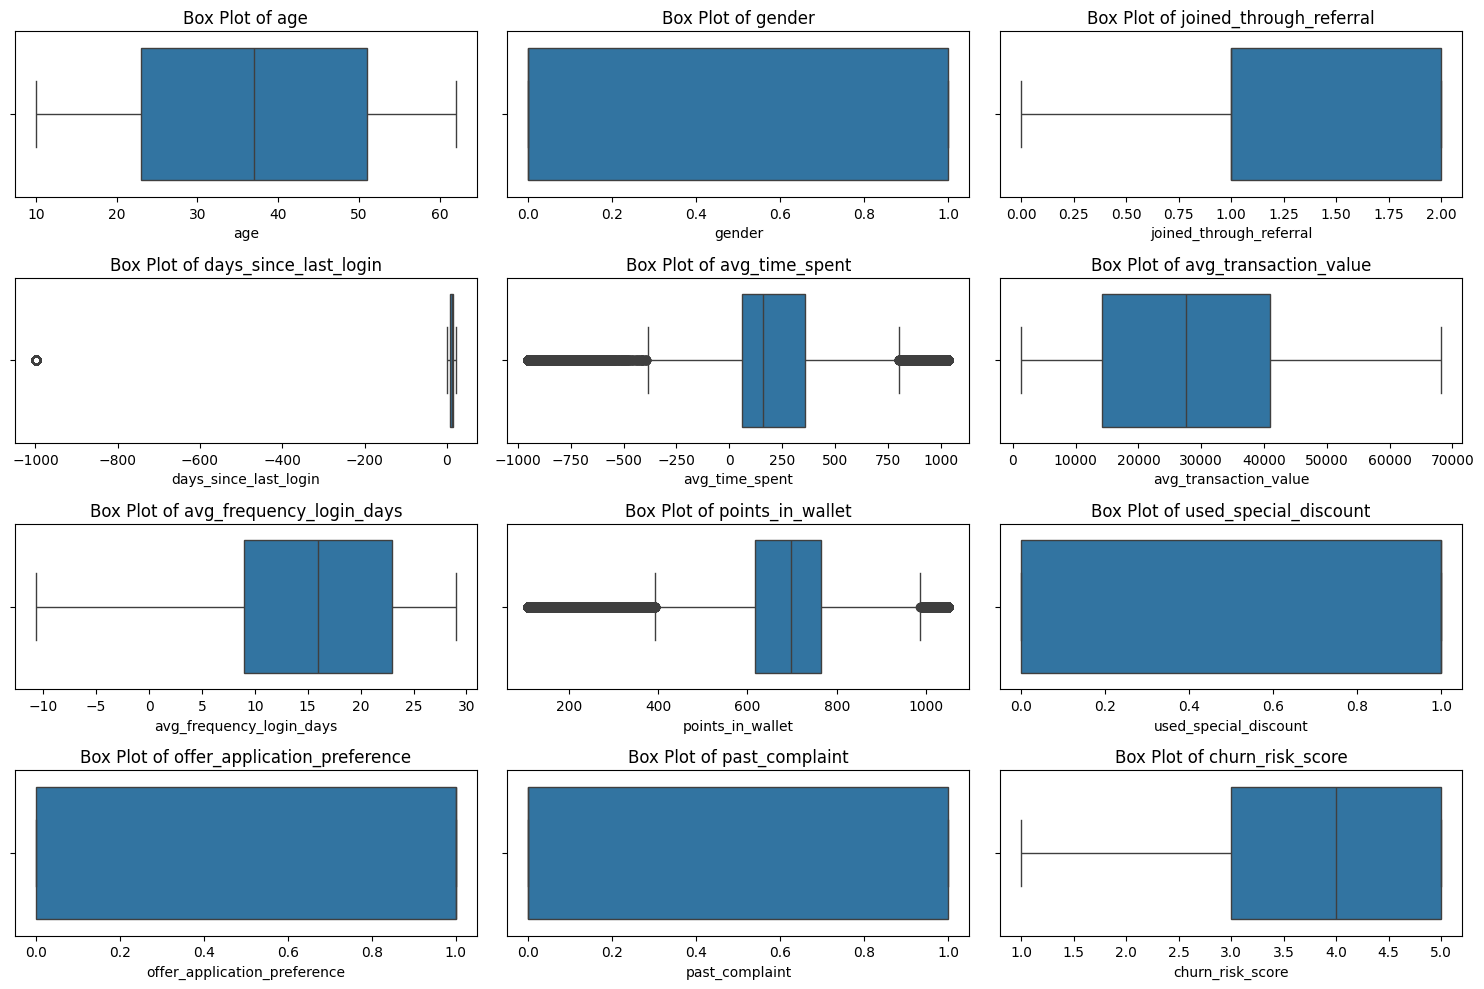

In [16]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(continues_variables):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=continues_variables[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show();

In [17]:
#OR we can Handle outliers such as 'avg_transaction_value' and 'points_in_wallet' using Interquartile Range (IQR)

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_fence, upper_fence, np.where(df[column] < lower_fence, lower_fence, df[column]))

# Apply outlier handling for 'avg_transaction_value' and 'points_in_wallet'
handle_outliers(df, 'avg_transaction_value')
handle_outliers(df, 'points_in_wallet')

1.5 Feature Engineering

In [18]:
# 1.5 Feature Engineering
df['customer_tenure'] = (pd.to_datetime('today') - df['joining_date']).dt.days
df['engagement_score'] = df['days_since_last_login'] / df['avg_time_spent']
# Example of engagement-based feature: active login days (from 'days_since_last_login')
df['active_days'] = 30 / df['days_since_last_login']  # Assuming logins per month
# Verify new features
print(df[['customer_tenure','engagement_score', 'active_days']].head())


   customer_tenure  engagement_score  active_days
0             2628          0.056548     1.764706
2             2907          0.027123     2.142857
3             2920          0.206495     2.727273
4             2602          0.176788     1.500000
5             3215          0.053042     1.304348


# Step 2: Exploratory Data Analysis (EDA)

2.1 Statistical Summaries

In [19]:
# We can compute basic statistics for key numerical variables by simply using describe() syntax.
df[['avg_time_spent', 'avg_transaction_value', 'avg_time_spent','age','avg_frequency_login_days', 'points_in_wallet', ]].describe()

,avg_time_spent,avg_transaction_value,avg_time_spent,age,avg_frequency_login_days,points_in_wallet
count,27640.000000,27640.000000,27640.000000,27640.000000,25002.000000,27640.000000
mean,243.407828,29053.739386,243.407828,37.077171,15.975759,688.373011
std,400.440543,18660.665064,400.440543,15.888225,9.235336,138.918197
min,-2814.109110,800.460000,-2814.109110,10.000000,-43.652702,394.115000
25%,59.650000,14233.377500,59.650000,23.000000,9.000000,616.587500
50%,161.545000,27565.660000,161.545000,37.000000,16.000000,698.570000
75%,356.097500,40898.487500,356.097500,51.000000,23.000000,764.902500
max,3040.410000,80896.152500,3040.410000,64.000000,73.061995,987.375000


2.2 Visualizations

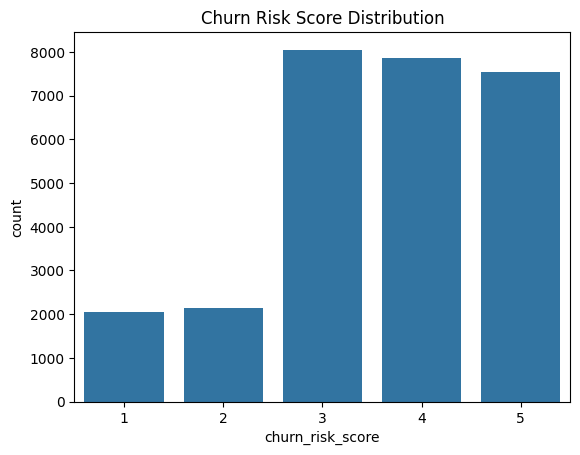

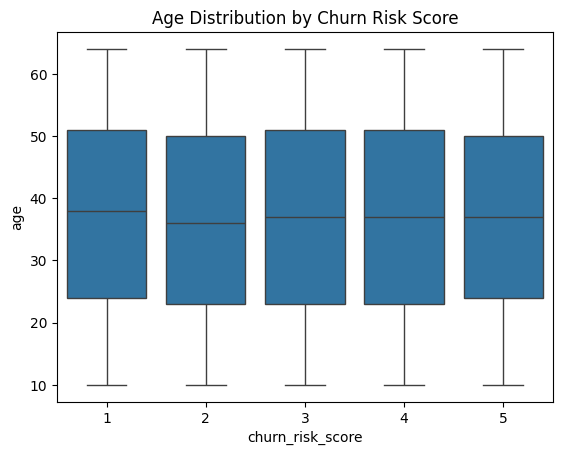

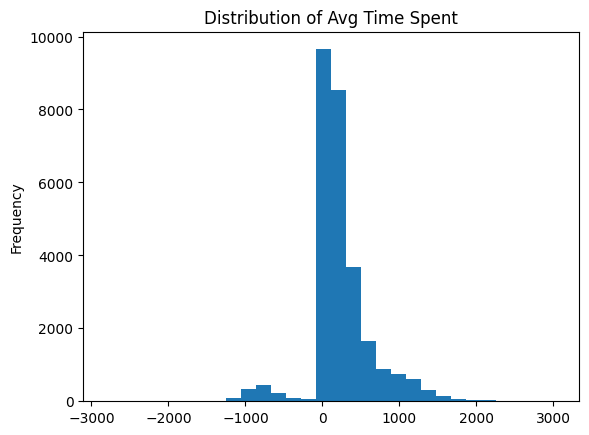

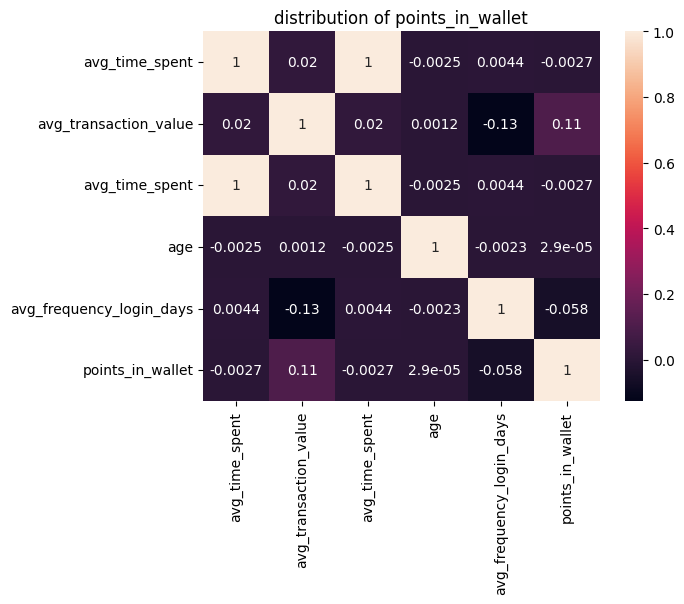

In [20]:
# Bar Plot for Categorical Variables


# Bar plot for churn_risk_score
sns.countplot(x='churn_risk_score', data=df)
plt.title('Churn Risk Score Distribution')
plt.show()

# Box Plot for Age vs. Churn Risk Score
sns.boxplot(x='churn_risk_score', y='age', data=df)
plt.title('Age Distribution by Churn Risk Score')
plt.show()



# Histogram for Numerical Variables

# Histogram for avg_time_spent
df['avg_time_spent'].plot(kind='hist', bins=30, title='Distribution of Avg Time Spent')
plt.show()

# Histogram for avg_transaction_value
df["points_in_wallet"].plot(kind="hist", bins=30, title="distribution of points_in_wallet")


# Correlation Heatmap: This will help to visualize the relationships between the numerical variables.
# Correlation matrix
correlation_matrix = df[['avg_time_spent', 'avg_transaction_value', 'avg_time_spent','age','avg_frequency_login_days', 'points_in_wallet']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

2.3 Customer Segmentation Analysis

For segmentation, we can group the data based on membership_category, region_category, and gender, then analyze how churn risk varies across these groups

    membership_category region_category  gender  churn_risk_score
0      Basic Membership            City       0          4.663230
1      Basic Membership            City       1          4.657021
2      Basic Membership            Town       0          4.650077
3      Basic Membership            Town       1          4.660202
4      Basic Membership         Village       0          4.630769
5      Basic Membership         Village       1          4.637470
6       Gold Membership            City       0          3.067780
7       Gold Membership            City       1          3.033708
8       Gold Membership            Town       0          3.080106
9       Gold Membership            Town       1          3.024459
10      Gold Membership         Village       0          2.960199
11      Gold Membership         Village       1          2.915789
12        No Membership            City       0          4.647852
13        No Membership            City       1          4.661661
14        

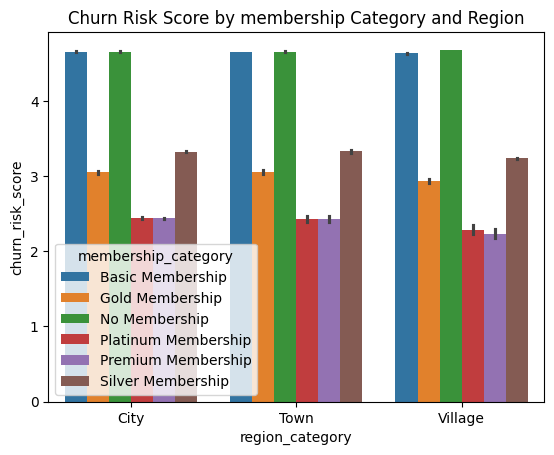

In [21]:
# Grouping data by membership_category, region_category, and gender
segmentation = df.groupby(['membership_category', 'region_category', 'gender'])['churn_risk_score'].mean().reset_index()

print(segmentation)

# Bar plot to visualize segmentation
sns.barplot(x='region_category', y='churn_risk_score', hue='membership_category', data=segmentation)
plt.title('Churn Risk Score by membership Category and Region')
plt.show()

# Step 3: Feature Selection and Data Splitting 

Step 3.1: Feature Selection

1. Handle Datetime Columns: Convert any datetime features to numerical features that are relevant for your analysis, such as extracting the year, month, or calculating days since the last event.

2. Apply Feature Selection Techniques: Once datetime features are converted, use correlation analysis, feature importance, or domain knowledge to select features.

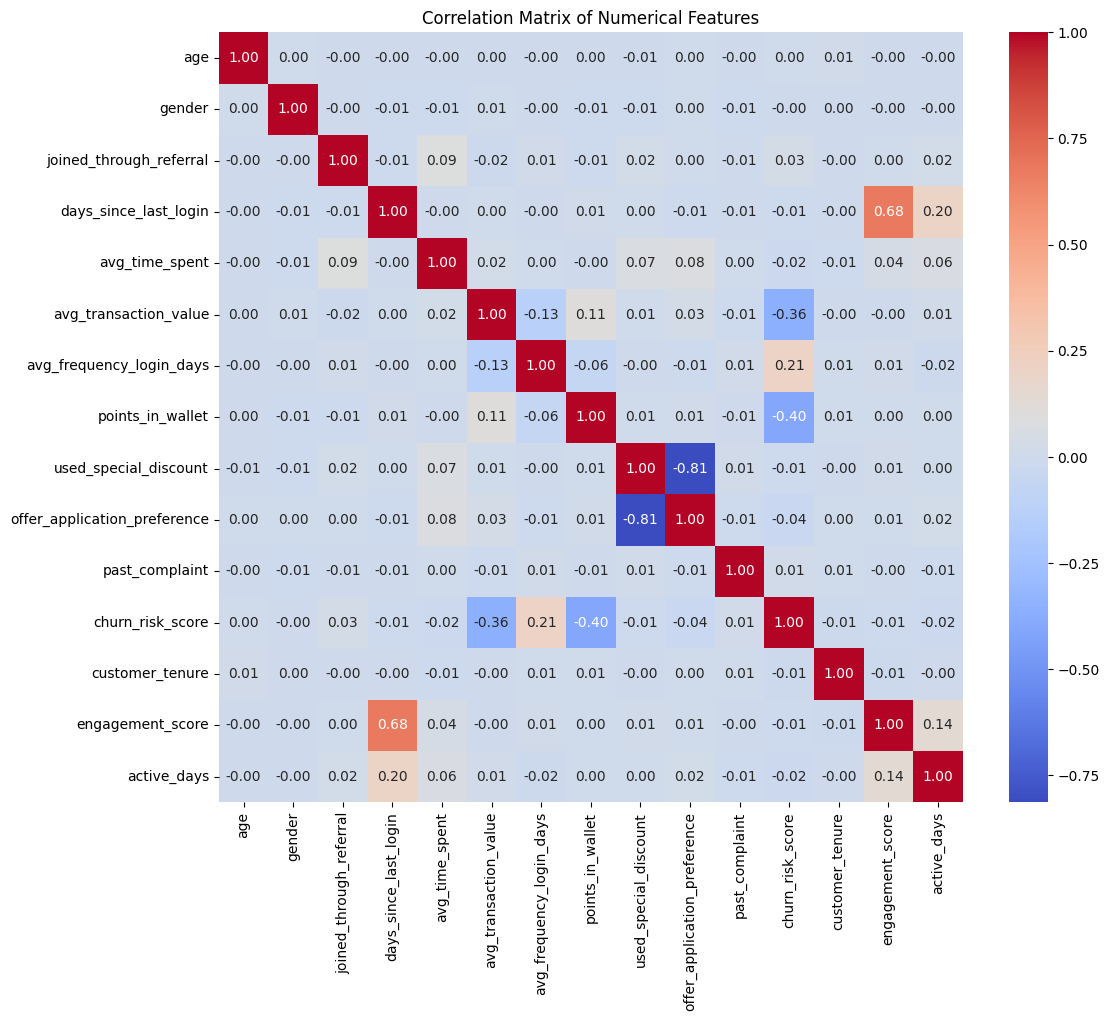

In [22]:
# 3.1 Feature Selection
# Step 1: Correlation Analysis
# Remove non-numeric columns for correlation analysis
numeric_features = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Remove features with high correlation (threshold > 0.85) if needed
high_correlation_features = [column for column in correlation_matrix.columns if any(correlation_matrix[column] > 0.85) and column != 'churn_risk_score']
df = df.drop(columns=high_correlation_features)


In [23]:
from sklearn.ensemble import RandomForestClassifier
# Check for non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

df = df.drop(columns= ["joining_date"])
# Apply Label Encoding or One-Hot Encoding to categorical columns
# Here, using LabelEncoder for simplicity (One-Hot Encoding can also be used depending on requirements)
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Define features and target
X = df.drop(columns=['churn_risk_score'])  # Replace 'churn_risk_score' with the actual target column if different
y = df['churn_risk_score']

# Fit Random Forest model for feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importances)

Non-numeric columns: Index(['customer_id', 'Name', 'security_no', 'region_category',
       'membership_category', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'complaint_status', 'feedback'],
      dtype='object')
Feature Importances:
membership_category      0.292666
feedback                 0.170336
customer_id              0.091672
security_no              0.091651
Name                     0.091168
last_visit_time          0.091063
referral_id              0.053562
complaint_status         0.031486
medium_of_operation      0.024777
internet_option          0.023170
region_category          0.020124
preferred_offer_types    0.018325
dtype: float64


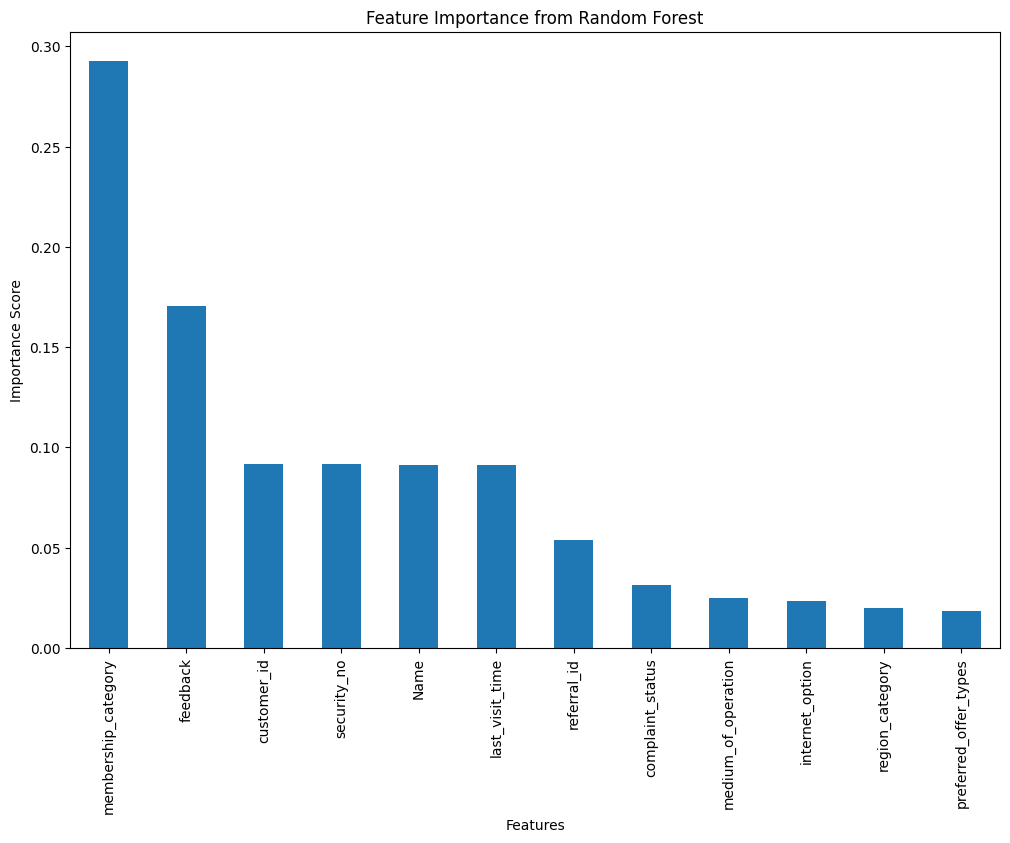

In [25]:
# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

# Selecting top N features based on importance (e.g., top 10 features)
top_features = feature_importances.head(10).index
df_final = df[top_features].join(df['churn_risk_score'])

3.2 Data Splitting

Split the dataset into training and test sets with stratification to preserve the class distribution in the churn risk score.

In [26]:
# Split the dataset (e.g., 80:20 split) and stratify on the target variable
X = df_final.drop(columns=['churn_risk_score'])
y = df_final['churn_risk_score']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirming the stratification
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))


Class distribution in training set:
churn_risk_score
3    0.291335
4    0.284642
5    0.272748
2    0.077062
1    0.074213
Name: proportion, dtype: float64

Class distribution in test set:
churn_risk_score
3    0.291245
4    0.284551
5    0.272793
2    0.077062
1    0.074349
Name: proportion, dtype: float64


# Step 4: Model Building

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


# Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boost = GradientBoostingClassifier(random_state=42)

# Train models
dt_model = decision_tree.fit(X_train, y_train)
rf_model = random_forest.fit(X_train, y_train)
gb_model = gradient_boost.fit(X_train, y_train)

# Evaluate performance on training set (to compare later)
print("Decision Tree Accuracy:", accuracy_score(y_train, dt_model.predict(X_train)))
print("Random Forest Accuracy:", accuracy_score(y_train, rf_model.predict(X_train)))
print("Gradient Boosting Accuracy:", accuracy_score(y_train, gb_model.predict(X_train)))

## 4.3 Hyperparameter Tuning for Random Forest (example)
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

## 4.4 Cross-validation
# Use k-fold cross-validation (k=5) for each model to check robustness
cv_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy for Random Forest:", cv_scores_rf.mean())



Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
Gradient Boosting Accuracy: 0.6966805354558611


KeyboardInterrupt: 

# Step 5: Model Evaluation on Test Set

In [ ]:


## 5.1 Metrics Calculation for best model (Random Forest)
y_pred_rf = best_rf_model.predict(X_test)
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, best_rf_model.predict_proba(X_test), multi_class='ovr'))

## 5.2 Final Model Choice
# Choosing Random Forest as it performs better with cross-validation scores and ROC-AUC

# Step 6: Business Insights & Recommendations

In [ ]:
## 6.1 Insight Generation
# Feature importance based on the Random Forest model
feature_importances = pd.DataFrame(best_rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

## 6.2 Retention Strategy
# Recommendations based on key features influencing churn

# Step 7: Documentation & Reporting

In [ ]:
## 7.1 Final Report
# Compile the results, insights, and suggested strategies into a professional report.

## 7.2 Code Documentation
# Ensure the code is well-commented, explaining each step and rationale.